In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

     

In [2]:
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 66.2MB/s]


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

In [4]:

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [5]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen =max_sequence_len, padding = 'pre'))

##create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)
     

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
##model.add(Bidirectional(LSTM(1024, return_sequences=True)))
##model.add(Bidirectional(GRU(512, return_sequences=True)))
##model.add(Bidirectional(LSTM(512,return_sequences=True)))
##model.add(Bidirectional(GRU(256, return_sequences = True)))
##model.add(Bidirectional(LSTM(256, return_sequences= True)))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(GRU(64,return_sequences = True)))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(GRU(32)))
model.add(Dense(total_words, activation = 'leaky_relu'))
model.add(Dense(total_words,activation = 'sigmoid'))
adam = Adam(lr = 0.005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 256)          176640    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          123648    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 15, 128)          98816     
 nal)                                                   

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='accuracy', min_delta=0, patience=8, verbose=0, mode='auto')


In [9]:
history = model.fit(xs, ys, epochs=100, verbose=1,callbacks=[callback])

Epoch 1/100
377/377 [==============================] - 42s 49ms/step - loss: 6.7215 - accuracy: 0.0630
Epoch 2/100
377/377 [==============================] - 8s 21ms/step - loss: 6.2517 - accuracy: 0.0677
Epoch 3/100
377/377 [==============================] - 7s 20ms/step - loss: 6.0089 - accuracy: 0.0815
Epoch 4/100
377/377 [==============================] - 8s 21ms/step - loss: 5.7609 - accuracy: 0.0868
Epoch 5/100
377/377 [==============================] - 7s 20ms/step - loss: 5.5289 - accuracy: 0.0987
Epoch 6/100
377/377 [==============================] - 9s 24ms/step - loss: 5.3039 - accuracy: 0.1094
Epoch 7/100
377/377 [==============================] - 8s 21ms/step - loss: 5.0698 - accuracy: 0.1219
Epoch 8/100
377/377 [==============================] - 7s 19ms/step - loss: 4.8065 - accuracy: 0.1305
Epoch 9/100
377/377 [==============================] - 8s 20ms/step - loss: 4.5231 - accuracy: 0.1491
Epoch 10/100
377/377 [==============================] - 7s 19ms/step - loss: 4.22

In [10]:
print(model)

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

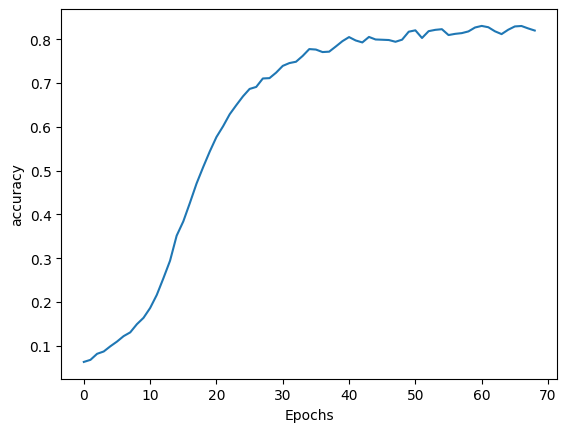

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
"""seed_text = "I've got a bad feeling about this"
next_words = 20
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  output_word = ""
  #print(f"these are the pred words {predicted}")
  for word, index in tokenizer.word_index.items():
    #print(f"these are ind {index}")
    if index in predicted:
      output_word = word
      break
  seed_text += " " + output_word
  
print(seed_text)
"""

'seed_text = "I\'ve got a bad feeling about this"\nnext_words = 20\n  \nfor _ in range(next_words):\n  token_list = tokenizer.texts_to_sequences([seed_text])[0]\n  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding=\'pre\')\n  predicted = model.predict(token_list, verbose=0)\n  output_word = ""\n  #print(f"these are the pred words {predicted}")\n  for word, index in tokenizer.word_index.items():\n    #print(f"these are ind {index}")\n    if index in predicted:\n      output_word = word\n      break\n  seed_text += " " + output_word\n  \nprint(seed_text)\n'

In [15]:
seed_text = "I've got a bad feeling about this"
next_words = 35
ouptut_text = ""
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""
     
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
             
    seed_text += " " + output_word
     
print(seed_text)

I've got a bad feeling about this mossy yet writin a sod my bride more more cry i more someone more more cry i cry more someone someone someone someone someone someone someone someone someone someone molly someone sinking someone straight someone
